Solving the classic house price prediction problem using Linear Regression algorithm from scratch.

In [1]:
from google.colab import files 

In [2]:
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lokmanezitouni","key":"e28c1a140988cc7ebedae4598af86d85"}'}

In [3]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Download and unzip dataset from kaggle :**

In [4]:
!kaggle datasets download -d anmolkumar/house-price-prediction-challenge

 94% 2.00M/2.13M [00:00<00:00, 2.81MB/s]
100% 2.13M/2.13M [00:00<00:00, 2.58MB/s]


In [5]:
!unzip /content/house-price-prediction-challenge.zip

Archive:  /content/house-price-prediction-challenge.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# **Import  libraries**

In [6]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
trainD = pd.read_csv("train.csv")
testD = pd.read_csv("test.csv")

#data = pd.concat([data_train,data_test])

#data = pd.read_csv("train.csv")
trainD

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [8]:
testD

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000
...,...,...,...,...,...,...,...,...,...,...,...
68715,Dealer,0,1,2,BHK,856.555505,1,1,"Thane West,Maharashtra",19.180000,72.963330
68716,Dealer,0,1,3,BHK,2304.147465,1,1,"Sector-66A Mohali,Mohali",30.661104,76.746082
68717,Dealer,1,1,1,BHK,33362.792750,0,0,"Balkum,Maharashtra",19.222101,72.988231
68718,Dealer,0,0,2,BHK,1173.708920,1,1,"Hadapsar,Pune",18.496670,73.941670


*  POSTED_BY – Category marking who has listed the property


* UNDER_CONSTRUCTION – Under Construction or Not

* RERA – Rera approved or Not

* BHK_NO – Number of Rooms

* BHK_OR_RK – Type of property

* SQUARE_FT – Total area of the house in square feet

* READY_TO_MOVE – Category marking Ready to move or Not

* RESALE – Category marking Resale or not

* ADDRESS – Address of the property

* LONGITUDE – Longitude of the property

* LATITUDE – Latitude of the property


In [9]:
trainD.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [10]:
trainD.info

<bound method DataFrame.info of       POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK    SQUARE_FT  \
0         Owner                   0     0        2       BHK  1300.236407   
1        Dealer                   0     0        2       BHK  1275.000000   
2         Owner                   0     0        2       BHK   933.159722   
3         Owner                   0     1        2       BHK   929.921143   
4        Dealer                   1     0        2       BHK   999.009247   
...         ...                 ...   ...      ...       ...          ...   
29446     Owner                   0     0        3       BHK  2500.000000   
29447     Owner                   0     0        2       BHK   769.230769   
29448    Dealer                   0     0        2       BHK  1022.641509   
29449     Owner                   0     0        2       BHK   927.079009   
29450    Dealer                   0     1        2       BHK   896.774194   

       READY_TO_MOVE  RESALE               

<Figure size 720x576 with 0 Axes>

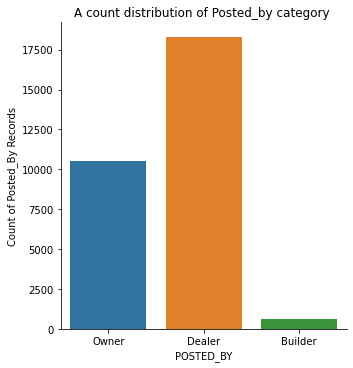

In [11]:
posted_counts= pd.value_counts(trainD.POSTED_BY)
plt.figure(figsize=(10,8))
ax=sns.catplot(x='POSTED_BY',kind='count',data=trainD)
plt.xlabel('POSTED_BY')
plt.ylabel('Count of Posted_By Records')
plt.title('A count distribution of Posted_by category ')
plt.show()

<Figure size 720x576 with 0 Axes>

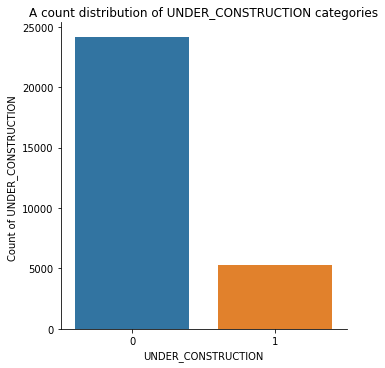

In [12]:
UNDER_CONSTRUCTION_counts= pd.value_counts(trainD.UNDER_CONSTRUCTION)
UNDER_CONSTRUCTION_counts
plt.figure(figsize=(10,8))
ax=sns.catplot(x='UNDER_CONSTRUCTION',kind='count',data=trainD)
plt.xlabel('UNDER_CONSTRUCTION')
plt.ylabel('Count of UNDER_CONSTRUCTION ')
plt.title('A count distribution of UNDER_CONSTRUCTION categories')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


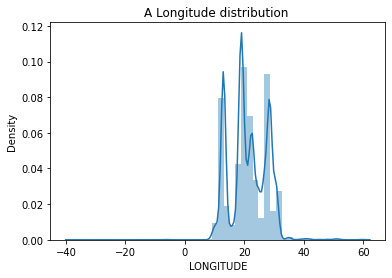

In [13]:
ax=sns.distplot(trainD.LONGITUDE,kde=True)
plt.title('A Longitude distribution ')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


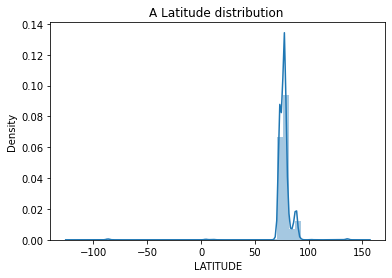

In [14]:
ax=sns.distplot(trainD.LATITUDE,kde=True)
plt.title('A Latitude distribution ')
plt.show()

<Figure size 720x576 with 0 Axes>

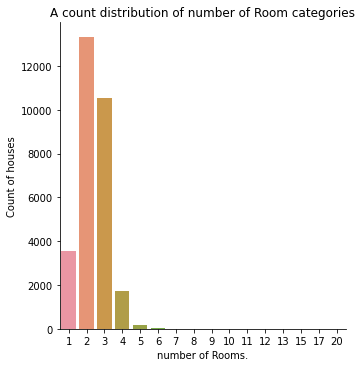

In [15]:
BHK_NO_counts= pd.value_counts(trainD['BHK_NO.'])

# A plot of BHK_NO categories
plt.figure(figsize=(10,8))
ax=sns.catplot(x='BHK_NO.',kind='count',data=trainD)
plt.xlabel('number of Rooms.')
plt.ylabel('Count of houses')
plt.title('A count distribution of number of Room categories')
plt.show()

In [16]:
trainD['TARGET(PRICE_IN_LACS)'].describe()

count    29451.000000
mean       142.898746
std        656.880713
min          0.250000
25%         38.000000
50%         62.000000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [17]:
#Lets examine the house with the highest price
trainD[trainD['TARGET(PRICE_IN_LACS)']==30000]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
11238,Dealer,0,0,3,BHK,187500000.0,1,1,"R.T. Nagar,Bangalore",13.0189,77.5963,30000.0


In [18]:
#Lets examine the house with the lowest price
trainD[trainD['TARGET(PRICE_IN_LACS)']==0.25]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
14036,Owner,0,0,3,BHK,1923.076923,1,1,"Bomikhal,Bhubaneswar",20.28238,85.855363,0.25


In [19]:
mean = trainD['TARGET(PRICE_IN_LACS)'].mean()
trainD['TARGET(PRICE_IN_LACS)'] = trainD['TARGET(PRICE_IN_LACS)'].fillna(mean)

trainD.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [20]:
trainD.corr()['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)

TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402685
BHK_NO.                  0.112283
RERA                     0.067636
UNDER_CONSTRUCTION       0.055399
LATITUDE                -0.017254
LONGITUDE               -0.031112
READY_TO_MOVE           -0.055399
RESALE                  -0.207378
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [21]:
BHK_NO_counts= trainD.value_counts(trainD['BHK_NO.'])
BHK_NO_counts

BHK_NO.
2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
10        4
15        4
20        4
9         3
12        3
11        1
13        1
17        1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Density Plot of house prices by rooms')

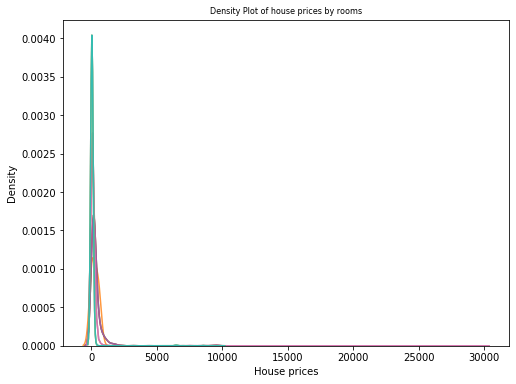

In [22]:
# Plot of distribution of sprices for rooms
plt.figure(figsize=(8,6))

# Plot each room distribution of prices
for BHK in BHK_NO_counts:
    # Select the room category
    subset = trainD[trainD['BHK_NO.'] == BHK]
    
    # Density plot of prices
    sns.kdeplot(subset['TARGET(PRICE_IN_LACS)'],label = BHK,shade = False, alpha = 0.8)
    
# label the plot
plt.xlabel('House prices', size = 10)
plt.ylabel('Density', size = 10) 
plt.title('Density Plot of house prices by rooms', size = 8)

In [50]:
base_features = ['POSTED_BY','UNDER_CONSTRUCTION','RERA','BHK_NO.','BHK_OR_RK','SQUARE_FT','LONGITUDE','LATITUDE']
y = trainD['TARGET(PRICE_IN_LACS)']
train_data = trainD[base_features]
test_data=   testD[base_features]

In [49]:
# label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['BHK_OR_RK']=le.fit_transform(train_data['BHK_OR_RK'])
train_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,LONGITUDE,LATITUDE
0,Owner,0,0,2,0,1300.236407,12.969910,77.597960
1,Dealer,0,0,2,0,1275.000000,12.274538,76.644605
2,Owner,0,0,2,0,933.159722,12.778033,77.632191
3,Owner,0,1,2,0,929.921143,28.642300,77.344500
4,Dealer,1,0,2,0,999.009247,22.592200,88.484911


In [51]:
train_data

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,LONGITUDE,LATITUDE
0,Owner,0,0,2,BHK,1300.236407,12.969910,77.597960
1,Dealer,0,0,2,BHK,1275.000000,12.274538,76.644605
2,Owner,0,0,2,BHK,933.159722,12.778033,77.632191
3,Owner,0,1,2,BHK,929.921143,28.642300,77.344500
4,Dealer,1,0,2,BHK,999.009247,22.592200,88.484911
...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,27.140626,78.043277
29447,Owner,0,0,2,BHK,769.230769,39.945409,-86.150721
29448,Dealer,0,0,2,BHK,1022.641509,26.928785,75.828002
29449,Owner,0,0,2,BHK,927.079009,12.900150,80.227910


In [52]:
#Convert categorical variable into dummy/indicator variables.
cat_cols = [cname for cname in train_data.columns 
                    if  train_data[cname].dtype == "object"]
Train_cat_colsOH= pd.get_dummies(train_data[cat_cols])
Test_cat_colsOH= pd.get_dummies(test_data[cat_cols])

train_data[cat_cols]

,POSTED_BY,BHK_OR_RK
0,Owner,BHK
1,Dealer,BHK
2,Owner,BHK
3,Owner,BHK
4,Dealer,BHK
...,...,...
29446,Owner,BHK
29447,Owner,BHK
29448,Dealer,BHK
29449,Owner,BHK


In [53]:
#Select numerical columns
num_cols = [cname for cname in train_data.columns 
            if train_data[cname].dtype in ['int64', 'float64']]

#scaler = StandardScaler()
#train_data[num_cols] = scaler.fit_transform(train_data[num_cols] )
#test_data[num_cols] = scaler.transform(test_data[num_cols] )

train_data[num_cols]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE
0,0,0,2,1300.236407,12.969910,77.597960
1,0,0,2,1275.000000,12.274538,76.644605
2,0,0,2,933.159722,12.778033,77.632191
3,0,1,2,929.921143,28.642300,77.344500
4,1,0,2,999.009247,22.592200,88.484911
...,...,...,...,...,...,...
29446,0,0,3,2500.000000,27.140626,78.043277
29447,0,0,2,769.230769,39.945409,-86.150721
29448,0,0,2,1022.641509,26.928785,75.828002
29449,0,0,2,927.079009,12.900150,80.227910


In [54]:


train_num_data = pd.DataFrame(train_data[num_cols])
test_num_data = pd.DataFrame(test_data[num_cols])

In [55]:
train_data =pd.concat([Train_cat_colsOH, train_num_data],axis=1) 
test_data =pd.concat([Test_cat_colsOH, test_num_data],axis=1) 

In [56]:
train_data.head()

,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_BHK,BHK_OR_RK_RK,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,LONGITUDE,LATITUDE
0,0,0,1,1,0,0,0,2,1300.236407,12.969910,77.597960
1,0,1,0,1,0,0,0,2,1275.000000,12.274538,76.644605
2,0,0,1,1,0,0,0,2,933.159722,12.778033,77.632191
3,0,0,1,1,0,0,1,2,929.921143,28.642300,77.344500
4,0,1,0,1,0,1,0,2,999.009247,22.592200,88.484911


In [57]:
# split validation set from training data
X_train, X_test, y_train, y_test =train_test_split(train_data,y,test_size=0.2,random_state=0)


In [58]:
# function to  train a given  model and evaluate it on the validation set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    mea = mean_absolute_error(y_test,y_pred)
    R2_score =r2_score(y_test,y_pred)
    rmse = np.sqrt((mean_squared_error(y_test, y_pred)))
    print("The root mean squared error generated...is {:.2f}".format(rmse))
    print("The R2_score value .....................is {:.4f}".format(R2_score))
    print("The mean absolute  error generated is .......is {:.2f}".format(mea))

In [59]:
linear_model = LinearRegression()

fit_and_evaluate(linear_model)

The root mean squared error generated...is 551.44
The R2_score value .....................is 0.3376
The mean absolute  error generated is .......is 127.00


In [60]:
SalesPrediction = linear_model.predict(X_test)
submission = pd.DataFrame({'Id': X_test.index, 'SalePrice': SalesPrediction})
submission.to_csv('submission.csv', index=False)
submission.head(10).set_index('Id')

,SalePrice
Id,
26350,269.268984
23308,-8.143425
16028,34.629792
28605,250.662337
21083,355.864026
9331,168.719585
11162,230.193188
9958,135.079699
7879,219.730044


In [64]:
df_train=pd.read_csv('train.csv')

In [65]:
df_train['CITY']=df_train['ADDRESS'].apply(lambda x: x.split(',')[-1])
df_train['CITY']

0        Bangalore
1           Mysore
2        Bangalore
3        Ghaziabad
4          Kolkata
           ...    
29446         Agra
29447         Vapi
29448       Jaipur
29449      Chennai
29450       Jaipur
Name: CITY, Length: 29451, dtype: object

In [66]:
train=df_train.drop(['ADDRESS','LONGITUDE','LATITUDE'],axis=1)

In [67]:
def map_city(city):
    if city in ['Ahmedabad', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Maharashtra']:
        return 'tier1'
    elif city in ['Agra', 'Ajmer', 'Aligarh', 'Amravati', 'Amritsar', 'Asansol', 'Aurangabad', 'Bareilly', 
                  'Belgaum', 'Bhavnagar', 'Bhiwandi', 'Bhopal', 'Bhubaneswar', 'Bikaner', 'Bilaspur', 'Bokaro Steel City', 
                  'Chandigarh', 'Coimbatore', 'Cuttack', 'Dehradun', 'Dhanbad', 'Bhilai', 'Durgapur', 'Dindigul', 'Erode', 
                  'Faridabad', 'Firozabad', 'Ghaziabad', 'Gorakhpur', 'Gulbarga', 'Guntur', 'Gwalior', 'Gurgaon', 'Guwahati', 
                  'Hamirpur', 'Hubli–Dharwad', 'Indore', 'Jabalpur', 'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 
                  'Jhansi', 'Jodhpur', 'Kakinada', 'Kannur', 'Kanpur', 'Karnal', 'Kochi', 'Kolhapur', 'Kollam', 'Kozhikode', 
                  'Kurnool', 'Ludhiana', 'Lucknow', 'Madurai', 'Malappuram', 'Mathura', 'Mangalore', 'Meerut', 'Moradabad', 
                  'Mysore', 'Nagpur', 'Nanded', 'Nashik', 'Nellore', 'Noida', 'Patna', 'Pondicherry', 'Purulia', 'Prayagraj', 
                  'Raipur', 'Rajkot', 'Rajahmundry', 'Ranchi', 'Rourkela', 'Ratlam', 'Salem', 'Sangli', 'Shimla', 'Siliguri', 
                  'Solapur', 'Srinagar', 'Surat', 'Thanjavur', 'Thiruvananthapuram', 'Thrissur', 'Tiruchirappalli', 'Tirunelveli', 
                  'Tiruvannamalai', 'Ujjain', 'Bijapur', 'Vadodara', 'Varanasi', 'Vasai-Virar City', 'Vijayawada', 'Visakhapatnam', 
                  'Vellore', 'Warangal']:
        return 'tier2'
    else:
        return 'tier3'

In [68]:
train['CITY']=train['CITY'].apply(map_city)

In [69]:
label_encoder=LabelEncoder()
train['POSTED_BY']=label_encoder.fit_transform(train['POSTED_BY'])
train['CITY']=label_encoder.fit_transform(train['CITY'])
train['BHK_OR_RK']=label_encoder.fit_transform(train['BHK_OR_RK'])
train.head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS),CITY
0,2,0,0,2,0,1300.236407,1,1,55.0,0
1,1,0,0,2,0,1275.000000,1,1,51.0,1
2,2,0,0,2,0,933.159722,1,1,43.0,0
3,2,0,1,2,0,929.921143,1,1,62.5,1
4,1,1,0,2,0,999.009247,0,1,60.5,0


In [70]:
train['SQUARE_FT']=np.log(train['SQUARE_FT'])
train['SQUARE_FT'].head()

0    7.170301
1    7.150701
2    6.838576
3    6.835100
4    6.906764
Name: SQUARE_FT, dtype: float64

In [71]:
X=train.drop(['TARGET(PRICE_IN_LACS)'],axis=1)
y=train['TARGET(PRICE_IN_LACS)']

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [73]:
#Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred

array([-470.59375,   47.0625 ,  148.0625 , ...,  -55.53125,  -14.9375 ,
       -462.5    ])

In [74]:
r2=r2_score(y_test,y_pred)
print('Accuracy of the linear regression model (R-Square value):',r2*100)

Accuracy of the linear regression model (R-Square value): 52.42488853175962


In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [77]:
#Random Forest Regressor 
rf_model=RandomForestRegressor(n_estimators=100,random_state=80)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
y_pred

array([  79.286     , 1093.55687143,   94.29      , ...,   36.18      ,
         53.798     ,   44.13671429])

In [78]:
r2=r2_score(y_test,y_pred)
print('Accuracy of the random forest regressor model (R-Square value):',r2*100)

Accuracy of the random forest regressor model (R-Square value): 92.58180210668158


In [79]:
#Decision Tree Regressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
y_pred

array([  80., 1700.,  100., ...,   32.,   55.,   14.])

In [80]:
r2=r2_score(y_test,y_pred)
print('Accuracy of the linear regression model (R-Square value):',r2*100)

Accuracy of the linear regression model (R-Square value): 87.5732164071002
